In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as k
%matplotlib inline 
c=k.c
h=k.Planck
k=k.Boltzmann
datos=np.loadtxt('IRCF.txt')

In [140]:
fr=datos[:,0:1] #Unidades 1/cm
es=datos[:,1:2] #Unidades MJy/sr
inc=datos[:,3:4] #Unidades kJy/sr
m=inc/1000 #Cambio de kJy a MJy
c2=c*100 #Cambio de m a cm para c
s=1/c2 #Equivalencia de 1s es igual a c2
fr2=((pow(fr,-1))*s)
fr3=(pow(fr2,-1))

[[6.80528880e+10]
 [8.15435486e+10]
 [9.53340016e+10]
 [1.08824662e+11]
 [1.22315323e+11]
 [1.36105776e+11]
 [1.49596437e+11]
 [1.63386890e+11]
 [1.76877550e+11]
 [1.90368211e+11]
 [2.04158664e+11]
 [2.17649325e+11]
 [2.31139985e+11]
 [2.44930438e+11]
 [2.58421099e+11]
 [2.72211552e+11]
 [2.85702212e+11]
 [2.99192873e+11]
 [3.12983326e+11]
 [3.26473987e+11]
 [3.39964647e+11]
 [3.53755100e+11]
 [3.67245761e+11]
 [3.81036214e+11]
 [3.94526875e+11]
 [4.08017535e+11]
 [4.21807988e+11]
 [4.35298649e+11]
 [4.48789310e+11]
 [4.62579763e+11]
 [4.76070423e+11]
 [4.89860876e+11]
 [5.03351537e+11]
 [5.16842198e+11]
 [5.30632651e+11]
 [5.44123311e+11]
 [5.57913764e+11]
 [5.71404425e+11]
 [5.84895086e+11]
 [5.98685539e+11]
 [6.12176199e+11]
 [6.25666860e+11]
 [6.39457313e+11]]


In [178]:
T=3
v=fr3

def I(v,T):
    z=((h*(pow(v,3)))/(pow(c,2)))*(1/((np.exp((h*v)/(k*T)))-1))
    return z
z=I(v,T)
print (z)

[[1.17927243e-18]
 [1.48835819e-18]
 [1.77657735e-18]
 [2.02050258e-18]
 [2.22036858e-18]
 [2.37616688e-18]
 [2.48106433e-18]
 [2.54189304e-18]
 [2.55966066e-18]
 [2.54075176e-18]
 [2.48884462e-18]
 [2.41160786e-18]
 [2.31347894e-18]
 [2.19673891e-18]
 [2.07109448e-18]
 [1.93520754e-18]
 [1.79856046e-18]
 [1.66122708e-18]
 [1.52266835e-18]
 [1.39088739e-18]
 [1.26433660e-18]
 [1.14152036e-18]
 [1.02854475e-18]
 [9.20870726e-19]
 [8.23401064e-19]
 [7.33731009e-19]
 [6.49992032e-19]
 [5.75570603e-19]
 [5.08225451e-19]
 [4.46285132e-19]
 [3.92000500e-19]
 [3.42482286e-19]
 [2.99414460e-19]
 [2.61202699e-19]
 [2.26700673e-19]
 [1.96977939e-19]
 [1.70294945e-19]
 [1.47432135e-19]
 [1.27426066e-19]
 [1.09597951e-19]
 [9.44281870e-20]
 [8.12398512e-20]
 [6.95600150e-20]]


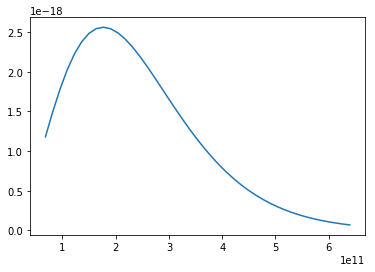

In [179]:
plt.plot(v,z)


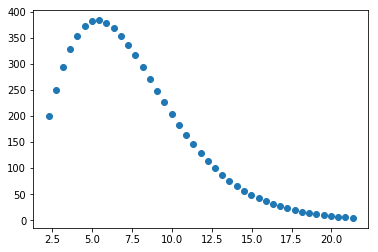

In [173]:
plt.scatter(fr,es)